In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import glob
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_loc = r'/content/drive/MyDrive/Machine Learning/Datasets/Chest Scan/chest_xray/train'
test_loc = r'/content/drive/MyDrive/Machine Learning/Datasets/Chest Scan/chest_xray/test'

Sample of Normal Images


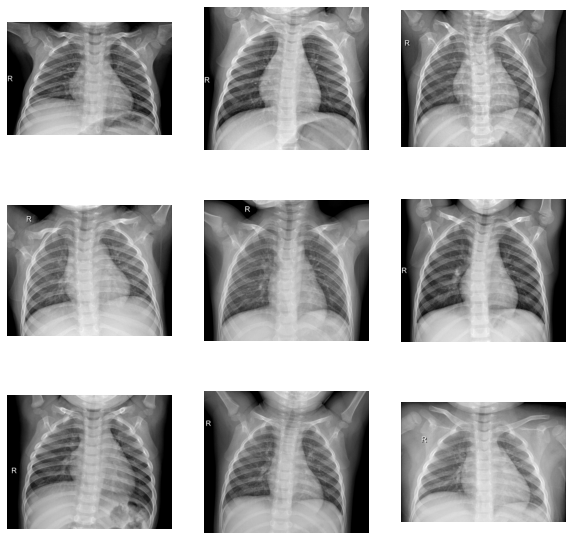

In [4]:
Normal_images = [image for image in os.listdir(r'/content/drive/MyDrive/Machine Learning/Datasets/Chest Scan/chest_xray/train/NORMAL')]

np.random.seed(42)
random_images = [np.random.choice(Normal_images, replace = False) for i in range(9)]

img_dir = '../content/drive/MyDrive/Machine Learning/Datasets/Chest Scan/chest_xray/train/NORMAL'

print('Sample of Normal Images')

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    img = plt.imread(os.path.join(img_dir,random_images[i]))
    plt.axis('off')
    plt.imshow(img,cmap='gray')  

Sample of Pneumonia Images


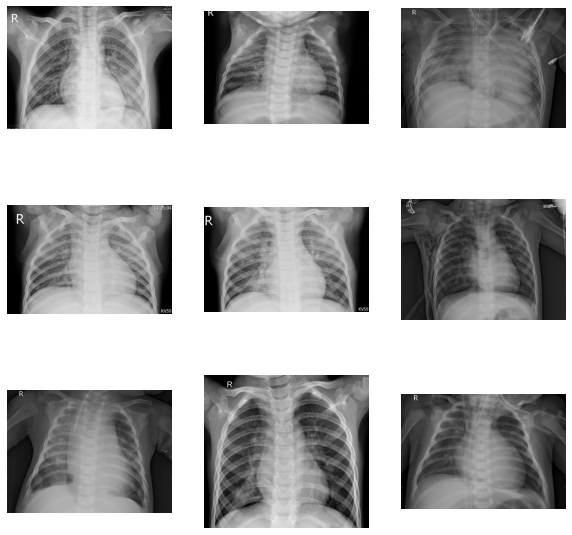

In [6]:
Pneumonia_images = [image for image in os.listdir(r'/content/drive/MyDrive/Machine Learning/Datasets/Chest Scan/chest_xray/train/PNEUMONIA')]

np.random.seed(42)
random_images = [np.random.choice(Pneumonia_images, replace = False) for i in range(9)]

img_dir = '../content/drive/MyDrive/Machine Learning/Datasets/Chest Scan/chest_xray/train/PNEUMONIA'

print('Sample of Pneumonia Images')

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    img = plt.imread(os.path.join(img_dir,random_images[i]))
    plt.axis('off')
    plt.imshow(img,cmap='gray')  

In [7]:
print('Train set:')
print('-'*20)
train_Normal = len(os.listdir(os.path.join(train_loc, 'NORMAL')))
train_Pneumonia = len(os.listdir(os.path.join(train_loc, 'PNEUMONIA')))
print(f'Normal = {train_Normal}')
print(f'Pneumonia = {train_Pneumonia}')

print('\nTest set:')
print('-'*20)
test_Normal = len(os.listdir(os.path.join(test_loc, 'NORMAL')))
test_Pneumonia = len(os.listdir(os.path.join(test_loc, 'PNEUMONIA')))
print(f'Normal = {test_Normal}')
print(f'Pneumonia = {test_Pneumonia}')

Train set:
--------------------
Normal = 1349
Pneumonia = 3883

Test set:
--------------------
Normal = 234
Pneumonia = 390


In [8]:
# Preprocessing
trdata = ImageDataGenerator(rescale=1/255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)
train_data = trdata.flow_from_directory(directory=train_loc, target_size=(224, 224))

tesldata = ImageDataGenerator(rescale=1/255)
test_data = tesldata.flow_from_directory(directory=test_loc, target_size=(224, 224))


Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(2, activation='softmax')
])

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
batch_size = 100
hist = model.fit(train_data,
                 steps_per_epoch=train_data.samples//batch_size,
                 validation_data=test_data,
                 validation_steps=test_data.samples//batch_size,
                 epochs=20
                 )

Epoch 1/20
52/52 [==============================] - 353s 7s/step - loss: 0.6395 - accuracy: 0.7791 - val_loss: 0.5433 - val_accuracy: 0.7292
Epoch 2/20
52/52 [==============================] - 238s 5s/step - loss: 0.2695 - accuracy: 0.8894 - val_loss: 0.5488 - val_accuracy: 0.7656
Epoch 3/20
52/52 [==============================] - 180s 3s/step - loss: 0.2738 - accuracy: 0.8834 - val_loss: 0.5535 - val_accuracy: 0.7396
Epoch 4/20
52/52 [==============================] - 132s 3s/step - loss: 0.2253 - accuracy: 0.9072 - val_loss: 0.2085 - val_accuracy: 0.8854
Epoch 5/20
52/52 [==============================] - 108s 2s/step - loss: 0.2068 - accuracy: 0.9123 - val_loss: 0.2555 - val_accuracy: 0.8750
Epoch 6/20
52/52 [==============================] - 84s 2s/step - loss: 0.2114 - accuracy: 0.9195 - val_loss: 0.6147 - val_accuracy: 0.7812
Epoch 7/20
52/52 [==============================] - 73s 1s/step - loss: 0.1820 - accuracy: 0.9255 - val_loss: 0.3844 - val_accuracy: 0.8646
Epoch 8/20
52/5

In [13]:
train_score = model.evaluate(train_data)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])

164/164 [==============================] - 129s 786ms/step - loss: 0.1541 - accuracy: 0.9427
Train Loss:  0.15414904057979584
Train Accuracy:  0.9426605701446533


In [14]:
test_score = model.evaluate(test_data)

print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

20/20 [==============================] - 9s 434ms/step - loss: 0.2401 - accuracy: 0.9087
Test Loss:  0.24009555578231812
Test Accuracy:  0.9086538553237915


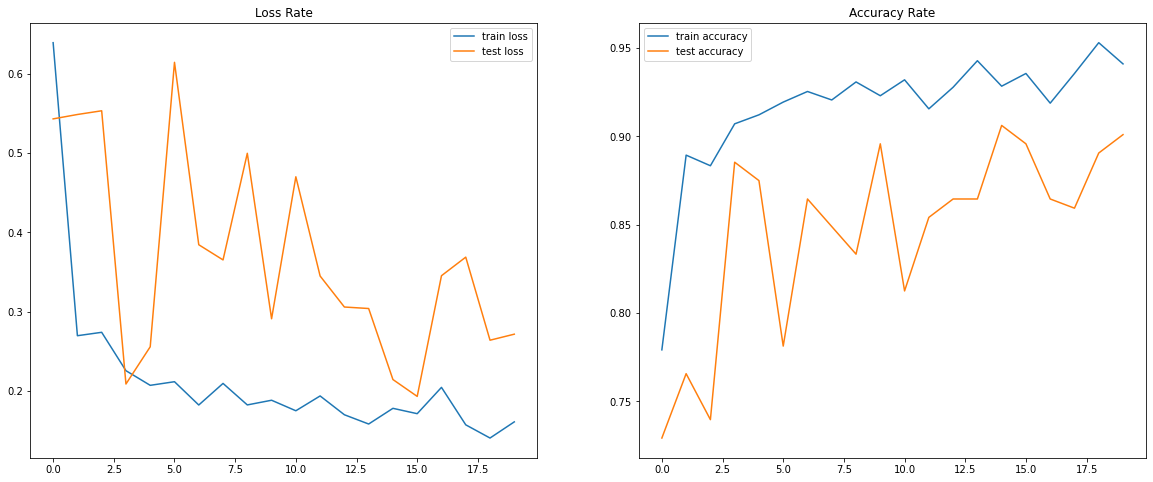

In [17]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='test loss')
plt.title('Loss Rate')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'],label='test accuracy')
plt.title('Accuracy Rate')
plt.legend()

plt.show()

In [59]:
test_steps_per_epoch = np.math.ceil(test_data.samples / test_data.batch_size)

predictions = model.predict(test_data, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_data.classes
class_labels = list(test_data.class_indices.keys()) 

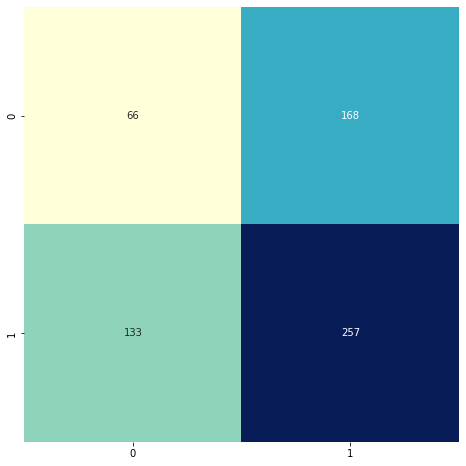

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, square=True, annot=True, cmap='YlGnBu', fmt='d', cbar=False)

TP = 72,      FP = 162        
FN = 127,       TN = 263

In [62]:
from sklearn.metrics import classification_report
report = classification_report(true_classes, predicted_classes,target_names=['NORMAL', 'PNEUMONIA'])
print(report)  

              precision    recall  f1-score   support

      NORMAL       0.33      0.28      0.30       234
   PNEUMONIA       0.60      0.66      0.63       390

    accuracy                           0.52       624
   macro avg       0.47      0.47      0.47       624
weighted avg       0.50      0.52      0.51       624

